# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers

In [2]:
dataset = pd.read_csv("creditcard.csv")

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
train_size = int(dataset.shape[0] * 0.5)
test_size = int((dataset.shape[0] * 0.3) + train_size)

In [6]:
y = dataset["Class"]
x = dataset.drop("Class", axis=1)

In [7]:
x_train, x_test, x_validate = x[:train_size], x[train_size:test_size], x[test_size:]
y_train, y_test, y_validate = y[:train_size], y[train_size:test_size], y[test_size:]

In [8]:
mean = x_train.mean()
x_train -= mean
std  = x_train.std()
x_train /= std

In [9]:
x_test -= mean
x_test /= std
x_validate -= mean
x_validate /= std

In [10]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(30, input_shape=(30,), activation="relu"))
    model.add(layers.Dense(10, activation="relu"))
    model.add(layers.Dense(8, activation="relu"))
    model.add(layers.Dense(3, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(metrics=["accuracy"], loss='binary_crossentropy', optimizer="rmsprop")
    
    return model

In [11]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 1,359
Trainable params: 1,359
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(x_train, y_train, validation_data=(x_validate, y_validate), epochs=100, shuffle=True, batch_size=64)

Epoch 1/100
2226/2226 [==============================] - 17s 7ms/step - loss: 0.0629 - accuracy: 0.9982 - val_loss: 0.0059 - val_accuracy: 0.9994
Epoch 2/100
2226/2226 [==============================] - 8s 4ms/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0077 - val_accuracy: 0.9994
Epoch 3/100
2226/2226 [==============================] - 8s 4ms/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 0.0047 - val_accuracy: 0.9995
Epoch 4/100
2226/2226 [==============================] - 11s 5ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0061 - val_accuracy: 0.9995
Epoch 5/100
2226/2226 [==============================] - 6s 3ms/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 0.0065 - val_accuracy: 0.9995
Epoch 6/100
2226/2226 [==============================] - 6s 3ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0054 - val_accuracy: 0.9996
Epoch 7/100
2226/2226 [==============================] - 6s 3ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0051 - val_

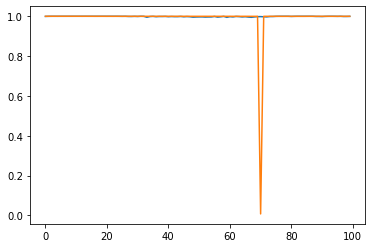

In [14]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

plt.plot(range(100), accuracy)
plt.plot(range(100), val_accuracy)
plt.show()

In [15]:
score = model.evaluate(x_test, y_test, batch_size=128)
print('\nAnd the Score is {:.0%}'.format(score[1]))

668/668 [==============================] - 5s 7ms/step - loss: 0.0324 - accuracy: 0.9924

And the Score is 99%


In [17]:
data_to_predict = x_test.to_numpy()[0]
data_to_predict = data_to_predict.reshape((-1, 30))
prediction = model.predict([np.array(data_to_predict)])

In [18]:
print("Predicted Value:", prediction)

Predicted Value: [[6.7328335e-07]]
